# 2CSSID-TP08Sup. Clustering



In [1]:
import matplotlib
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.21.4', '1.3.4', '3.5.0')

In [2]:
from typing          import Tuple, List, Type
from collections.abc import Callable

## I. Réalisation des algorithmes

Dans cette partie, nous allons implémenter K-Means. 
Deux fonctions d'initialisation seront implémentées : aléatoire et K-Means++.
Le dataset utilisé pour le test est celui-ci.

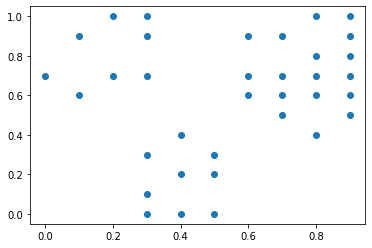

In [3]:
X_test = np.array([
    [0.3, 0.0], [0.4, 0.0], [0.5, 0.0],
    [0.3, 0.1],
    [0.4, 0.2], [0.5, 0.2],
    [0.3, 0.3], [0.5, 0.3],
    [0.4, 0.4], [0.8, 0.4],
    [0.7, 0.5], [0.9, 0.5], 
    [0.1, 0.6], [0.6, 0.6], [0.7, 0.6], [0.8, 0.6], [0.9, 0.6],
    [0.0, 0.7], [0.2, 0.7], [0.3, 0.7], [0.6, 0.7], [0.7, 0.7], [0.8, 0.7], [0.9, 0.7], 
    [0.8, 0.8], [0.9, 0.8], 
    [0.1, 0.9], [0.3, 0.9], [0.6, 0.9], [0.7, 0.9], [0.9, 0.9], 
    [0.2, 1.0], [0.3, 1.0], [0.8, 1.0], [0.9, 1.0]
])

scatter = plt.scatter(X_test[:, 0], X_test[:, 1])
plt.show()

### I.1. Initialisation KMeans

Ici, nous allons choisir K centres de clusters en utilisant deux méthodes :
1. Initialisation aléatoire
1. Initialisation kmeans++

#### I.1.1. Initialisation aléatoire

Choisir $K$ centres aléatoirement.

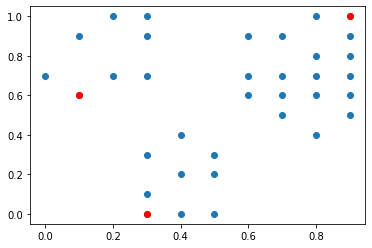

In [4]:
#TODO: Initialisation Kmeans aléatoire
def init_centroid_aleatoire(X, K: int) -> List[int]:
    return None

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# Trois points rouges aléatoires à chaque exécution
#---------------------------------------------------------------------

C = init_centroid_aleatoire(X_test, 3)

plt.scatter(X_test[:, 0], X_test[:, 1])
plt.scatter(C[:, 0], C[:, 1], color='red')
plt.show()
    

#### I.1.2. Initialisation plus-plus

- Choisir un échantillon aléatoirement comme premier centre ;
- Tant que le nombre des centres n'a pas atteint K faire :
    - Calculer la distance de chaque échantillon avec les centres déjà choisis ;
    - Pour chaque échantillon, choisir la distance minimale parmi les centres ;
    - Choisir l'échantillon avec la distance maximale parmi les échantillons.

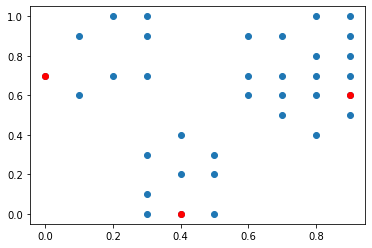

In [5]:
#TODO: Initialisation Kmeans++
def init_centroid_plus_plus(X, K: int) -> List[int]:
    M = len(X)
    centers = []
    centers.append(X[np.random.randint(M), :]) # premier centre
    
    # Compléter ici
                
    return np.array(centers)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# Trois points rouges distants l'un de l'autre
#---------------------------------------------------------------------

C = init_centroid_plus_plus(X_test, 3)
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.scatter(C[:, 0], C[:, 1], color='red')
plt.show()

### I.2. Regroupement avec centres

Etant donné un ensemble des échantillons et des centres, nous allons retourner le groupe de chaque échantillon (retourner Y).
- $X$ : une liste des échantillons
- $C$ : une liste des clusters
- $Y$ : une liste des numéros de clusters ; pour chaque échantillons, affecter le numéro du cluster.

In [6]:
#TODO: Regrouper des échantillons selon des centres
def regrouper(X, C):
    M = len(X)
    Y = []
    # Compléter ici
    
    return np.array(Y)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1,
#        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])
#---------------------------------------------------------------------

regrouper(X_test, X_test[[12, 16, 8], :])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

### I.3. Centroid

Etant donné un ensemble des échantillons, nous devons trouver le centre.

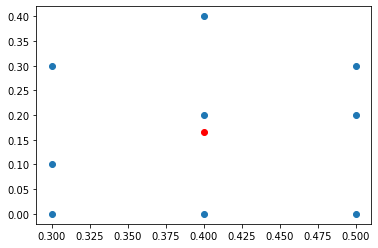

In [7]:
#TODO: Calculer le centroid
def calculer_centroid(Xp):
    return None

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# Un point rouge proche de celui au centre
#---------------------------------------------------------------------

X_test1 = X_test[:9, :]
cc = calculer_centroid(X_test1)

plt.scatter(X_test1[:, 0], X_test1[:, 1])
plt.scatter(cc[0], cc[1], color='red')
plt.show()

### I.4. Regrouper le tout

**Rien à programmer ici**

In [8]:
def calculer_centroids(X, Y):
    G = np.unique(Y)
    K = len(G)
    M = len(Y)
    G_new = []
    for g in G: 
        X_g = X[(Y == g), :]
        G_new.append(calculer_centroid(X_g))
        
    return np.array(G_new)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[0.1875    , 0.8125    ],
#        [0.78823529, 0.72352941],
#        [0.42      , 0.21      ]])
#---------------------------------------------------------------------

Y_test = np.array([
    2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 
    0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 
    1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

calculer_centroids(X_test, Y_test)

array([[0.1875    , 0.8125    ],
       [0.78823529, 0.72352941],
       [0.42      , 0.21      ]])

In [9]:
def Kmeans(X, K, init='aleatoire', max_it=100):
    changed = True
    if init == 'plus_plus':
        C = init_centroid_plus_plus(X, K)
        print('plus_plus')
    else:
        C = init_centroid_aleatoire(X, K)
    it = 0
    while it < max_it and changed:
        it += 1
        Y = regrouper(X, C)
        C_new = calculer_centroids(X, Y)
        if np.array_equal(np.sort(C), np.sort(C_new)):
            changed = False
        C = C_new
        #print(C)
    return Y

# Résultat : un vecteur avec trois classes {0, 1, 2}
Y_res = Kmeans(X_test, 3)

Y_res

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0])

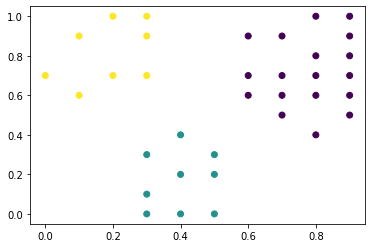

In [10]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_res)
plt.show()

plus_plus


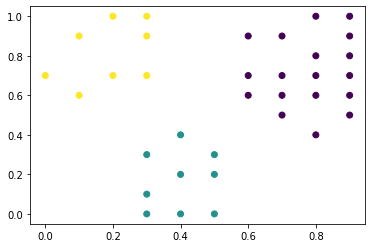

In [11]:
Y_res2 = Kmeans(X_test, 3, init='plus_plus')

scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_res2)
plt.show()

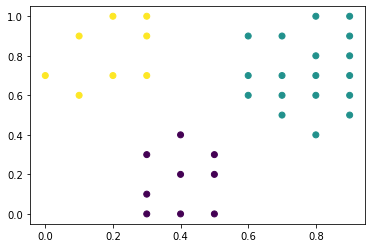

In [12]:
# Pour comparer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_test)
res3=kmeans.labels_

plt.scatter(X_test[:, 0], X_test[:, 1], c=res3)
plt.show()

## II. Application et analyse


- Modèles de connectivité (Connectivity models)
   - [Hierarchical agglomerative clustering (HAC)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
- Modèles basés sur les centroïdes (Centroid-based)
   - [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Modèles basés sur la densité (Density-based)
   - [Density-based spatial clustering of applications with noise (DBSCAN)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
   - [Ordering points to identify the clustering structure (OPTICS)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS)
   - [Mean shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)
   - [Balanced iterative reducing and clustering using hierarchies (BIRCH)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html#sklearn.cluster.Birch)
- Modèles basés sur des distributions (Distribution models)
   - [Loi normale multivariée (Multivariate normal distribution)](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
- Modèles neuronaux (Neural models)
   - Carte autoadaptative (Self-organizing map: SOM)


Ici, nous allons tester quelques algorithmes en utilisant un dataset synthétique.  
Le code pour générer le dataset a été pris d'ici [https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html]()

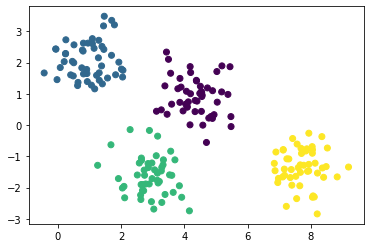

In [13]:
from sklearn.datasets import make_blobs

X_blob, Y_blob = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)
X_blob = X_blob[:, ::-1] # flip axes for better plotting


plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob)
plt.show()

### II.1. KMeans

Algorithme : 

1. Choisir K points comme centres initiaux des clusters ;
1. Affecter chaque échantillon au centre le plus proche ;
1. Recalculer les nouveaux centres des clusters ;
1. Si les centres restent toujours les mêmes, retourner les clusters ;
1. Sinon, sauter vers l'étape (2).

#### II.1.1. Initialisation des centres dans KMeans

Ici, nous voulons tester l'effet de l'initialisation des clusters de l'algorithme K-Means. 
Pour ce faire, nous allons utiliser le dataset précédent (avec 3 clusters qui sont clairs visuellement).
Dans scikit-learn, il existe deux conditions d'arrêt : la tolerence (tol) et le nombre des itérations (max_iter). 
Nous allons définir une grande tolérence pour forcer l'algorithme à s'arrêter plus tôt. 
En plus, cette implémentation utilise plusieurs exécutions (n_init) pour choisir la meilleur solution en terme de centralité (distance des échantillons de leurs centres).
Donc, nous avons besoin d'une seule exécution. 

Maintenant, nous voulons tester la capacité de clustering en utilisant deux initialisations :
- aléatoire
- kmeans++

Nous exécutons les algorithmes plusieurs fois pour tester l'algorithme le plus stable visuellement.

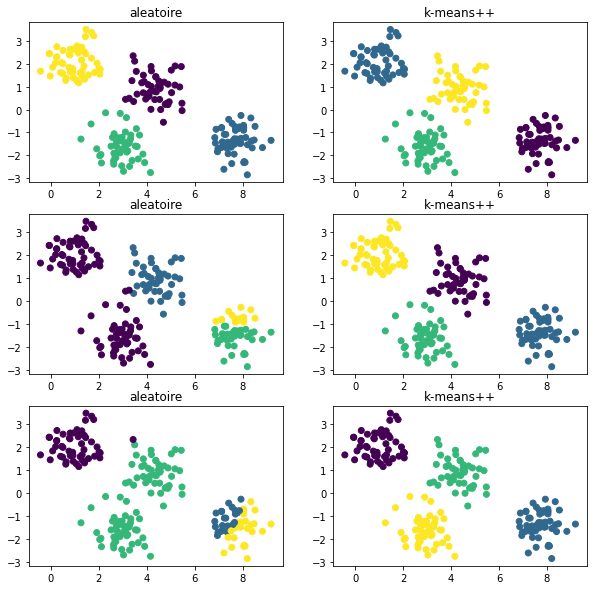

In [14]:
from sklearn.cluster import KMeans

NBR_TEST = 3

# ----------------------
fig, axs = plt.subplots(NBR_TEST, 2, figsize=(10,10))

# ----------------------

for nbr in range(NBR_TEST):
    kmeans_rndm = KMeans(n_clusters=4, init='random', n_init=1, algorithm='full', tol=100).fit(X_blob)
    Y_rndm=kmeans_rndm.labels_
    
    kmeans_pp = KMeans(n_clusters=4, init='k-means++', n_init=1, algorithm='full', tol=100).fit(X_blob)
    Y_pp=kmeans_pp.labels_
    
    axs[nbr, 0].scatter(X_blob[:, 0], X_blob[:, 1], c=Y_rndm)
    axs[nbr, 0].set_title('aleatoire')
    axs[nbr, 1].scatter(X_blob[:, 0], X_blob[:, 1], c=Y_pp)
    axs[nbr, 1].set_title('k-means++')
#     plt.xlabel("sepal length")
#     plt.ylabel("sepal width")
#     axs[nbr].set_title('')

plt.show()

**TODO: Analyser les résultats** 

- Quel est l'initialisation la plus stable (clusters presque identiques ; plus déterministe) et pourquoi ?
- Avec moins de tolérence (tol), l'initialisation aléatoire peut être aussi stable. Comment ceci peut affecter la performance de l'algorithme ?

**Réponse**

- ...
- ...

#### II.1.2. Nombre des clusters dans KMeans

Nous voulons tester l'affet du choix du nombre de clusters. 
Ici, nous utilisons l'initialisation 'kmeans++'.

Premièrement, nous vérifions visuellement si les échantillons sont bien regroupés.
Deuxièmement, nous utilisons une métrique appelée 'silhouette' pour décider quel est le nombre des clusters (valeur silhouette grande => un clustering mieux)

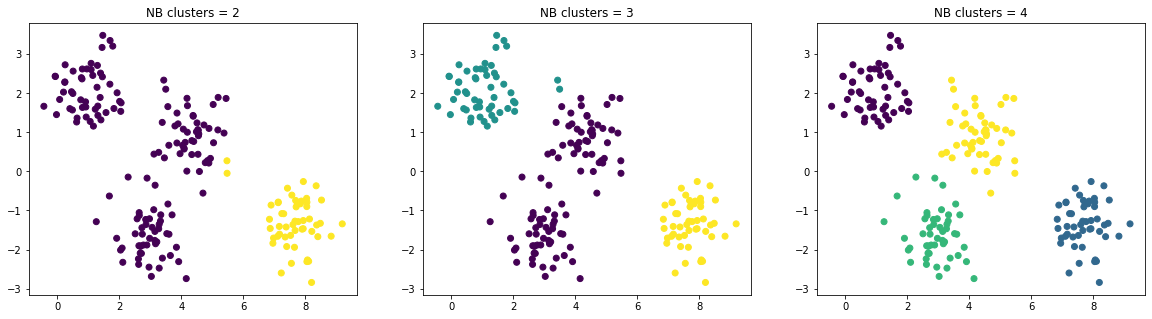

In [15]:
CLS = [2, 3, 4]

# ----------------------
fig, axs = plt.subplots(1, len(CLS), figsize=(20,5))
# ----------------------

    
for c in range(len(CLS)):
    kmeans = KMeans(n_clusters=CLS[c], n_init=1, algorithm='full').fit(X_blob)
    Y=kmeans.labels_
    
    axs[c].scatter(X_blob[:, 0], X_blob[:, 1], c=Y)
    axs[c].set_title('NB clusters = ' + str(CLS[c]))

plt.show()

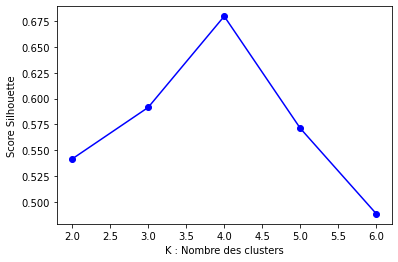

In [16]:
from sklearn.metrics import silhouette_score
CLS = [2, 3, 4, 5, 6]
sil = []
 
for c in range(len(CLS)):
    kmeans = KMeans(n_clusters=CLS[c], n_init=1, algorithm='full').fit(X_blob)
    Y=kmeans.labels_
    sil.append(silhouette_score(X_blob, Y))

plt.plot(CLS, sil, 'bo-')
plt.xlabel('K : Nombre des clusters') 
plt.ylabel('Score Silhouette') 
plt.show()

**TODO: Analyser les résultats** 

- Selon le fonctionnement de l'algorithme et le résultat visuel, est ce que KMeans peut ne pas affecter des échantillons à un des clusters (valeur abérente) ? Pourquoi ?
- Si nous appliquons un post-traitement après KMeans tel que les points vraiment loins des points du contour sont considérer comme valeurs abérentes, est-ce que ceci est toujours correcte ? Pourquoi ?
- Lorsque le nombre des attributs est grand ainsi que le nombre des échantillons, KMeans prend plus de temps. Si nous voulons trouver le nombre des clusters optimal avec silhouette, ceci va prendre beacoup de temps. Si nous savons la borne maximale de K est fixée, proposer une solution pour trouver K en moins de temps.

**Réponse**

- ...
- ...
- ...

### II.2. DBSCAN

Algorithme : 

1. Identifier les voisins de chaque point en utilisant une distance et un seuil de distance $\epsilon$ ;
1. Identifier les points clés : ceux qui ont un nombre de voisins supérieur à un nombre donné ;
1. Trouver les composantes connectées des points essentiels et leurs voisins (pour créer les clusters) ;
1. Affecter chaque point non clé au cluster le plus proche, si ce point possède une distance moins de $\epsilon$ d'un point de ce cluster ;
1. Sinon, les points qui ne sont pas aussi proches à un des clusters sont marqués comme bruit.

#### II.2.1. Distance maximale

Nous voulons tester l'effet de la distance sur la qualité de regroupement.
Dans notre exemple, il est clair que le nombre des clusters est 4.
Nous varions la distance et nous observons le nombre des clusters et des points abérents.

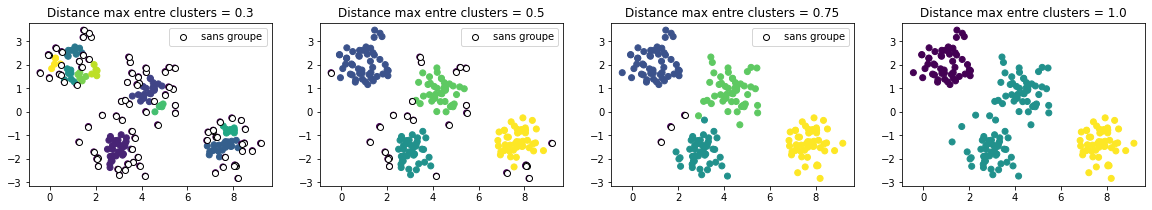

In [17]:
from sklearn.cluster import DBSCAN

# L'algorithme est déterministe => même si nous l'appliquons plusieurs fois, nous aurons le même résultat
# Donc, nous l'appliquons une seule fois

DIST = [0.3, 0.5, 0.75, 1.]

# ----------------------
fig, axs = plt.subplots(1, len(DIST), figsize=(20, 3))
# ----------------------
    
for d in range(len(DIST)):
    dbscan = DBSCAN(eps=DIST[d]).fit(X_blob)
    Y=dbscan.labels_
    
    axs[d].scatter(X_blob[:, 0], X_blob[:, 1], c=Y)
    axs[d].set_title('Distance max entre clusters = ' + str(DIST[d]))
    
    # chercher les échantillons qui n'ont pas de cluster (-1 comme Y)
    idx = Y == -1
    if True in idx:
        axs[d].scatter(X_blob[idx, 0], X_blob[idx, 1], c='white', edgecolors='black', label='sans groupe')
        axs[d].legend()


plt.show()

**TODO: Analyser les résultats** 

- Que pouvons-nous observer lorsque la distance est petite ou grande (nombre des clusters, nombre des points de bruit) ?
- Pourquoi ?
- Dans cette exemple, dans quel cas pouvons-nous savoir que le dataset est mal-groupé ?

**Réponse**

- ...
- ...
- ...

#### II.2.2. Nombre minimal des échantillons dans un cluster

Ce paramètre est défini en se basant sur le domaine d'application. 
Nous voulons tester l'effet de ce paramètre sur le nombre des clusters et le bruit.

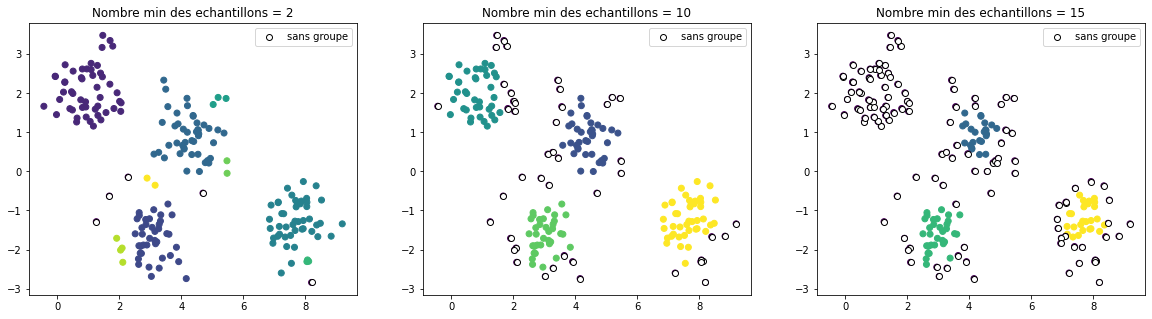

In [18]:
# L'algorithme est déterministe => même si on l'applique plusieurs fois, on aura le même résultat
# Donc, on applique une seule fois

NBR_MIN = [2, 10, 15]

# ----------------------
fig, axs = plt.subplots(1, len(NBR_MIN), figsize=(20,5))
# ----------------------
    
for n in range(len(NBR_MIN)):
    dbscan = DBSCAN(eps=0.5, min_samples=NBR_MIN[n]).fit(X_blob)
    Y=dbscan.labels_
    
    axs[n].scatter(X_blob[:, 0], X_blob[:, 1], c=Y)
    axs[n].set_title('Nombre min des echantillons = ' + str(NBR_MIN[n]))
    
    # chercher les échantillons qui n'ont pas de cluster (-1 comme Y)
    idx = Y == -1
    if True in idx:
        axs[n].scatter(X_blob[idx, 0], X_blob[idx, 1], c='white', edgecolors='black', label='sans groupe')
        axs[n].legend()

plt.show()

**TODO: Analyser les résultats** 

- Quel est l'effet de ce paramètre sur le nombre des clusters et des valeurs abérentes ?
- Pourqoi ?

**Réponse**

- ...
- ...

### II.3. Classification ascendante hiérarchique

Algorithme : 

1. Considérer chaque échantillon comme cluster ;
1. Fusionner les clusters les plus proches deux à deux ;
1. Sortir si le nombre des clusters est atteint ;
1. Sortir si les clusters ne sont pas proches selon un seuil de distance.

Donc, il faut spécifier un des deux paramètres : soit le nombre des clusters ou le seuil de distance.

#### II.3.1. Nombre des clusters dans le regroupement hiérarchique



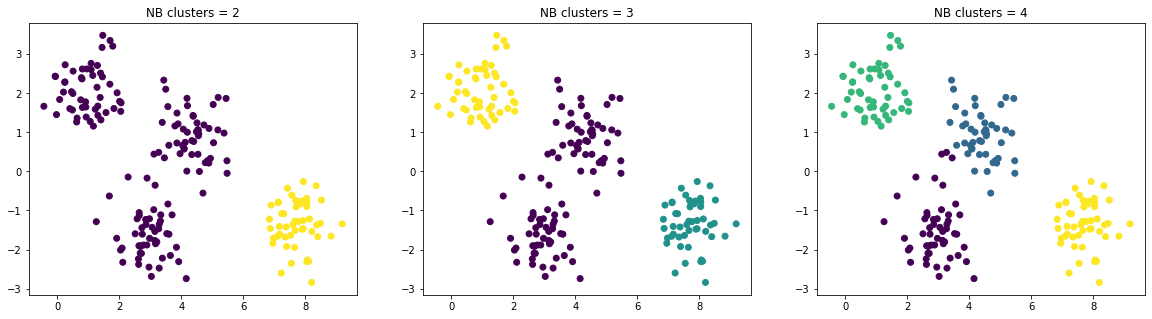

In [19]:
from sklearn.cluster import AgglomerativeClustering

CLS = [2, 3, 4]

# ----------------------
fig, axs = plt.subplots(1, len(CLS), figsize=(20, 5))

# ----------------------

    
for c in range(len(CLS)):
    ac = AgglomerativeClustering(n_clusters=CLS[c]).fit(X_blob)
    Y=ac.labels_
    
    axs[c].scatter(X_blob[:, 0], X_blob[:, 1], c=Y)
    axs[c].set_title('NB clusters = ' + str(CLS[c]))

plt.show()

**TODO: Analyser les résultats** 
- Cet algorithme donne toujours le même résultat contrairement à KMeans, pourquoi ?

**Réponse**
- ...

#### II.3.2. Seuil de distance dans le regroupement hiérarchique

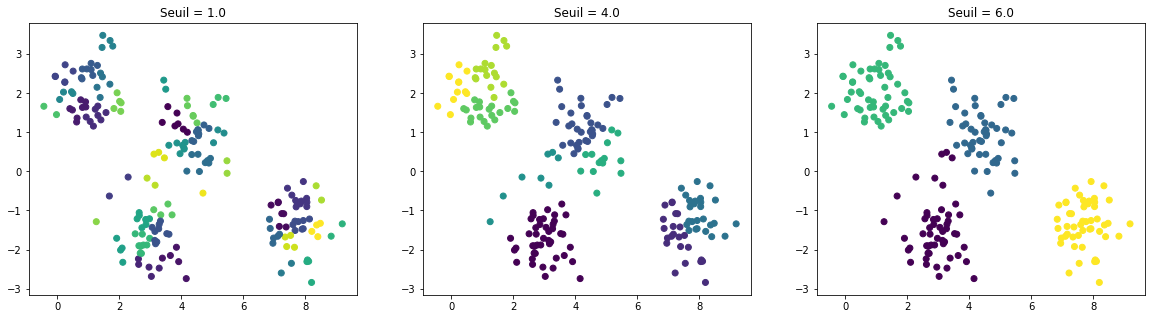

In [20]:
TH = [1., 4., 6.]

# ----------------------
fig, axs = plt.subplots(1, len(TH), figsize=(20,5))

# ----------------------

    
for t in range(len(TH)):
    ac = AgglomerativeClustering(n_clusters=None, distance_threshold=TH[t]).fit(X_blob)
    Y=ac.labels_
    
    axs[t].scatter(X_blob[:, 0], X_blob[:, 1], c=Y)
    axs[t].set_title('Seuil = ' + str(TH[t]))
    
    # chercher les échantillons qui n'ont pas de cluster (-1 comme Y)
    # Normalement cette algorithme n'a pas d'échantillons non groupés
    # Mais, on veut vérifier ça ici
    idx = Y == -1
    if True in idx:
        axs[n].scatter(X_blob[idx, 0], X_blob[idx, 1], c='white', edgecolors='black', label='sans groupe')
        axs[n].legend()

plt.show()

**TODO: Analyser les résultats** 
- Pourquoi avec un petit seuil, aurons-nous plus de clusters ?
- Est-ce que nous aurons des échantillons non affectés comme DBSCAN ?

**Réponse**
- ...
- ...

### II.4. Loi normal : Gaussian mixture models (GMMs)

Ici, nous supposons que chaque cluster suit un loi normal. Dans ce cas, chaque point appartient à un cluster avec une probabilité.Etant donné $K$ clusters, chaque cluster $C_k$ a une distribution normale $(\mu_k, \Sigma_k)$ avec une densité $\pi_k$ où $\pi_1 + ... + \pi_K = 1$. Afin de trouver les meilleurs distributions, nous allons utiliser un algorithme itératif appelé EM (Expectation-Maximisation) contenant deux étapes : E-step et M-step.

Algorithme : 

1. Initialiser $\mu_k, \Sigma_k, \pi_k$ d'une manière aléatoire ou appliquer KMeans pour trouver les K clusters initiaux.
1. Tant que le nombre max des itérations n'est pas atteint :
   1. E-Step : Pour chaque point $x_i$, calculer la probabilité qu'il appartient à un(e) cluster/distribution $C_k$ comme suit : $$r_{ik} = \frac{\pi_k N(x_i ; \mu_k, \Sigma_k)}{\sum_{k'} \pi_{k'} N(x_i ; \mu_{k'}, \Sigma_{k'})}$$
   1. M-step : Recalculer les paramètres :
   $$\pi_k = \frac{\text{Nombre de points de k}}{\text{Nombre de tous les points}}$$
   $$\mu_k = \frac{1}{\text{Nombre de points de k}} \sum_i r_{ik} x_i$$
   $$\Sigma_k = \frac{1}{\text{Nombre de points de k}} \sum_i r_{ik} (x_i - \mu_k)^2$$

#### II.4.1. Nombre des composants

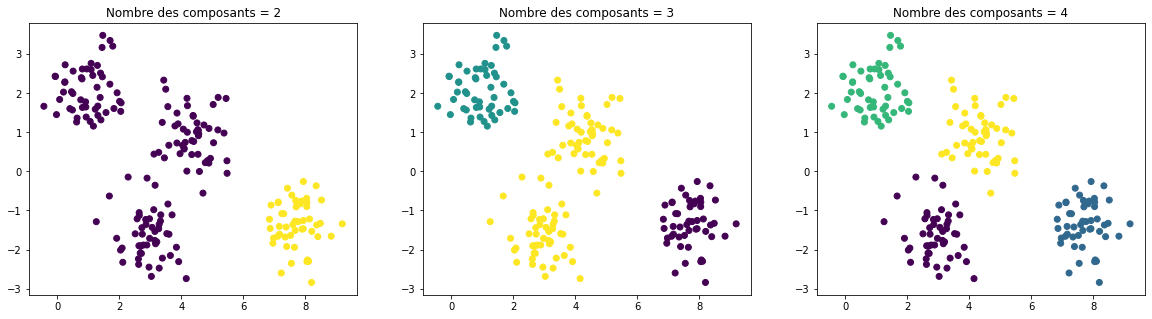

In [21]:
from sklearn.mixture import GaussianMixture

CLS = [2, 3, 4]

# ----------------------
fig, axs = plt.subplots(1, len(CLS), figsize=(20, 5))
# ----------------------

    
for c in range(len(CLS)):
    gauss = GaussianMixture(n_components=CLS[c]).fit(X_blob)
    Y=gauss.predict(X_blob)
    
    axs[c].scatter(X_blob[:, 0], X_blob[:, 1], c=Y)
    axs[c].set_title('Nombre des composants = ' + str(CLS[c]))

plt.show()

**TODO: Analyser les résultats** 

- ...
- ...

**Réponse**

- ...
- ...

#### II.4.2. Type du co-variance

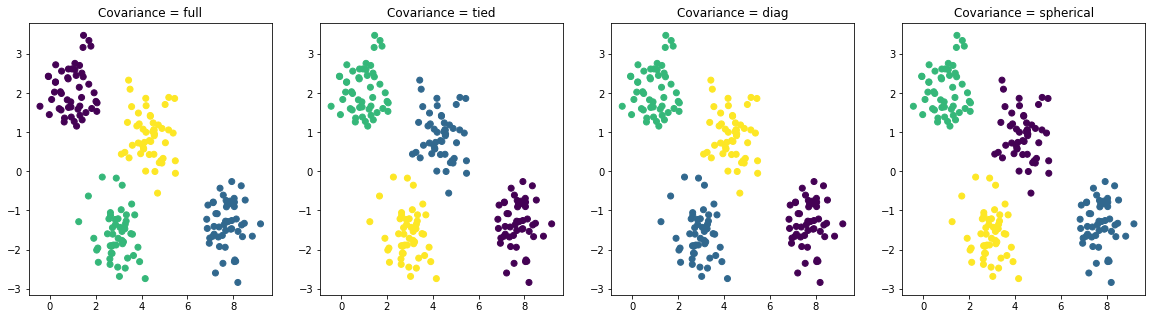

In [22]:
COV = ['full', 'tied', 'diag', 'spherical']

# ----------------------
fig, axs = plt.subplots(1, len(COV), figsize=(20, 5))
# ----------------------

    
for c in range(len(COV)):
    gauss = GaussianMixture(n_components=4, covariance_type=COV[c]).fit(X_blob)
    Y=gauss.predict(X_blob)
    
    axs[c].scatter(X_blob[:, 0], X_blob[:, 1], c=Y)
    axs[c].set_title('Covariance = ' + COV[c])

plt.show()

**TODO: Analyser les résultats** 

- ...
- ...

**Réponse**

- ...
- ...

### II.2. Comparaison entre quelques algorithmes de clustering

- M : nombre des échantillons 
- N : nombre des caractéristiques
- K : nombre des clusters
- T : nombre des itérations 
- D : nombre moyen des voisins d'un point

Voici un tableau qui résume la complexité de quelques algorithme (concept vu en module "CRP") :

| Algorithme      | Approche  |Complexité (temps) |  |
| ----------- | ----------- | ----------- | ----------- |
| KMeans      | centroïdes | Moyenne : $O(KMT)$,<br /> Pire : $O(M^{(K+2/N)})$ |  |
| MeanShift   | densité | N petit : $O(T M \log(M))$,<br /> N grand : $O(T M^2)$        |        |
| DBSCAN      | densité | $O(M D)$        |        |
| GMM      | distribution | $O(M K N^3)$        |        |

#### II.2.1. Nature du problème

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

In [23]:
from sklearn import datasets

# problemes = (
#     ()

# )

# algos = (
#         ("KMeans", two_means),
#         ("DBSCAN", dbscan),
#         ("Agglomerative\nClustering", average_linkage),
#         ("BIRCH", birch),
#         ("Gaussian\nMixture", gmm)
#     )



**TODO: Analyser les résultats** 

- ...
- ...

**Réponse**

- ...
- ...

#### II.2.2. Performance

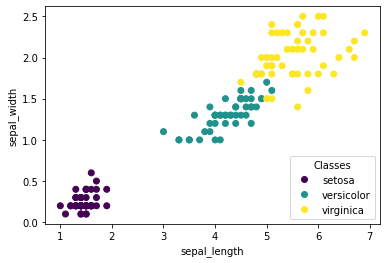

In [24]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data
Y_iris = iris.target

scatter = plt.scatter(X_iris[:, 2], X_iris[:, 3], c=Y_iris)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
plt.show()

**TODO: Analyser les résultats** 

- ...
- ...

**Réponse**

- ...
- ...